## 2.3 Key features and target

- Features:
  - cay_FC
  - cay_MS (MLE and Gibbs)
  - Macroeconomic controls

- Target:
  - Future equity returns over horizons:
    - 1 quarter
    - 4 quarters
    - 16 quarters

## 2.4 Preprocessing

- Log-transformations applied to consumption and wealth.
- PCA computed on standardized macro factor matrix.
- Missing values handled via last observation carried forward within macro controls.
- Future return targets constructed via rolling window sums of quarterly returns.

---

We will proceed to 3. Feature Engineering next. Let me know to continue.


## 3.4 Regime switching indicators

### 3.4.1 MLE-based regime probabilities

Markov-switching regressions (Hamilton filter) were estimated to obtain smoothed regime probabilities and cay_MS fitted values.

### 3.4.2 Bayesian Gibbs-based regime probabilities

Custom Gibbs sampler with macro controls was implemented, yielding:

- Posterior samples for regime-dependent parameters (α, β)
- Inferred state sequences (regime allocations)
- cay_MS residual series constructed accordingly

## 3.5 Correlation analysis

Pairwise correlations and scatter plots were used to assess the predictive relationship between constructed CAY variables and future returns at various horizons.

## 3.6 Autocorrelation and PACF

Autocorrelation (ACF) and Partial Autocorrelation (PACF) functions of residual series were analyzed to detect persistence patterns and mean-reversion signals.

---

Next is 4. Baseline Model. Let me know to continue.



### Key Results Summary

| Predictor | R² (OOS) | Sharpe Ratio (annualized) |
|-----------|----------|----------------------------|
| cay_MS_yt_gibbs | -0.26 | 0.91 |
| cay_MS_MLE_pca | -0.20 | 0.93 |
| cay_MS_yt_gibbs_macro | -0.00 | 2.64 |
| … | … | … |



### Interpretation

- Negative R² values are common in return forecasting due to noise dominance, but:
  - Sharpe ratios remain positive, indicating potential economic value for directional trading.
  - The Gibbs models with macro controls yield the highest Sharpe Ratios.

✅ Adding macro controls at the forecasting stage generally improves risk-adjusted returns even when the underlying model was built without them.


### Practical Implications

1. Forecast sign-based trading may be profitable despite low R².  
2. Bayesian regime-switching models with macro conditioning provide the best out-of-sample performance.  
3. Further improvements may come from:
   - Incorporating higher-frequency macro data
   - Ensemble methods combining multiple model forecasts

In the next section, we build a backtesting pipeline to translate these forecasts into concrete trading strategy simulations and evaluate their financial viability.

---

### Next steps

- Investigate feature engineering to improve R².  
- Evaluate whether high Sharpe models maintain performance out-of-sample and in live trading.  
- Test combination models (e.g. weighted ensembles) to integrate directional strength with magnitude accuracy.




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# === Extract MLE smoothed probabilities ===

# Use the provided DataFrames directly
mle_regime0_yt = smoothed_probs_yt[0].values
mle_regime1_yt = smoothed_probs_yt[1].values

mle_regime0_yt_macro = smoothed_probs_yt_macro[0].values
mle_regime1_yt_macro = smoothed_probs_yt_macro[1].values

# Compute Bayesian posterior regime probabilities
bayesian_regime0_yt = (outputs_yt['s_samples'] == 0).mean(axis=0)
bayesian_regime1_yt = (outputs_yt['s_samples'] == 1).mean(axis=0)

bayesian_regime0_yt_macro = (outputs_yt_macro['s_samples'] == 0).mean(axis=0)
bayesian_regime1_yt_macro = (outputs_yt_macro['s_samples'] == 1).mean(axis=0)

bayesian_regime0_pca = (outputs_pca_macro['s_samples'] == 0).mean(axis=0)
bayesian_regime1_pca = (outputs_pca_macro['s_samples'] == 1).mean(axis=0)

bayesian_regime0_pca_macro = (outputs_pca_macro['s_samples'] == 0).mean(axis=0)
bayesian_regime1_pca_macro = (outputs_pca_macro['s_samples'] == 1).mean(axis=0)

# For PCA, you may want to use the correct smoothed probabilities if available
# Here, placeholders are used; replace with actual DataFrames if needed
mle_regime0_pca = mle_regime0_yt  # Replace with actual PCA MLE regime 0
mle_regime1_pca = mle_regime1_yt  # Replace with actual PCA MLE regime 1

mle_regime0_pca_macro = mle_regime0_yt_macro  # Replace with actual PCA macro MLE regime 0
mle_regime1_pca_macro = mle_regime1_yt_macro  # Replace with actual PCA macro MLE regime 1

dates = smoothed_probs_yt.index

fig, axes = plt.subplots(2, 4, figsize=(24, 8), sharex=True)

# Yt Regime 0
axes[0, 0].plot(dates, mle_regime0_yt, label='MLE Regime 0', alpha=0.7)
axes[0, 0].plot(dates, bayesian_regime0_yt, label='Bayesian Regime 0', alpha=0.7)
axes[0, 0].set_title('Yt Regime 0')
axes[0, 0].legend()

# Yt Regime 1
axes[1, 0].plot(dates, mle_regime1_yt, label='MLE Regime 1', alpha=0.7)
axes[1, 0].plot(dates, bayesian_regime1_yt, label='Bayesian Regime 1', alpha=0.7)
axes[1, 0].set_title('Yt Regime 1')
axes[1, 0].legend()

# PCA Regime 0
axes[0, 1].plot(dates, mle_regime0_pca, label='MLE Regime 0', alpha=0.7)
axes[0, 1].plot(dates, bayesian_regime0_pca, label='Bayesian Regime 0', alpha=0.7)
axes[0, 1].set_title('PCA Regime 0')
axes[0, 1].legend()

# PCA Regime 1
axes[1, 1].plot(dates, mle_regime1_pca, label='MLE Regime 1', alpha=0.7)
axes[1, 1].plot(dates, bayesian_regime1_pca, label='Bayesian Regime 1', alpha=0.7)
axes[1, 1].set_title('PCA Regime 1')
axes[1, 1].legend()

# Yt Macro Regime 0
axes[0, 2].plot(dates, mle_regime0_yt_macro, label='MLE Regime 0', alpha=0.7)
axes[0, 2].plot(dates, bayesian_regime0_yt_macro, label='Bayesian Regime 0', alpha=0.7)
axes[0, 2].set_title('Yt Macro Regime 0')
axes[0, 2].legend()

# Yt Macro Regime 1
axes[1, 2].plot(dates, mle_regime1_yt_macro, label='MLE Regime 1', alpha=0.7)
axes[1, 2].plot(dates, bayesian_regime1_yt_macro, label='Bayesian Regime 1', alpha=0.7)
axes[1, 2].set_title('Yt Macro Regime 1')
axes[1, 2].legend()

# PCA Macro Regime 0
axes[0, 3].plot(dates, mle_regime0_pca_macro, label='MLE Regime 0', alpha=0.7)
axes[0, 3].plot(dates, bayesian_regime0_pca_macro, label='Bayesian Regime 0', alpha=0.7)
axes[0, 3].set_title('PCA Macro Regime 0')
axes[0, 3].legend()

# PCA Macro Regime 1
axes[1, 3].plot(dates, mle_regime1_pca_macro, label='MLE Regime 1', alpha=0.7)
axes[1, 3].plot(dates, bayesian_regime1_pca_macro, label='Bayesian Regime 1', alpha=0.7)
axes[1, 3].set_title('PCA Macro Regime 1')
axes[1, 3].legend()

plt.tight_layout()
plt.show()

In [126]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import matplotlib.pyplot as plt
import yfinance as yf
from utils import *
from models import *
import seaborn as sns
import arviz as az
import pandas as pd

import numpy as np
import random

# Set seed for reproducibility
SEED = 45
np.random.seed(SEED)
random.seed(SEED)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Table of Contents

1. [Introduction](#introduction)
    - [Theoretical Motivation](#theoretical-motivation)
2. [Data Overview](#data-overview)
   - [Feature Engineering](#feature-engineering)
3. [Methodology](#methodology)
   - [Cointegration regression (Fixed-Coefficient cay)](#cointegration-regression-(fixed-Coefficient-cay))
   - [Markov Switching (MLE)](#markov-switching-mle)
   - [Regime Probability Plots Interpretation](#regime-probability-plots-interpretation)
   - [Gibbs Sampling Bayesian MS](#gibbs-sampling-bayesian-ms)
   - [Interpretation of Gibbs Sampling Diagnostics](#interpretation-of-gibbs-sampling-diagnostics)
4. [In-Sample Model Results](#in-sample-model-results))
   - [Forecast Regression Results Overview and Summary](#forecast-regression-results-overview-and-summary)
5. [Out-of-Sample Forecasting Results Overview and Summary](#out-of-sample-forecasting-results-overview-and-summary)
   - [out-of-sample forecasting results](#out-of-sample-forecasting-results)
6. [Conclusion and Next Steps](#conclusion-and-next-steps)


### 1. Introduction

This notebook replicates and extends the core findings of Bianchi et al. (2016), who propose that allowing for Markov regime-switching in the consumption-wealth-income (cay) cointegration relationship yields improved insights into expected returns and economic dynamics. Therefore this notebook will investigate the predictive power of different implementations of the consumption-wealth ratio (CAY) for forecasting equity returns. Specifically, we compare:

- Traditional forecast combinations (FC)
- Markov Switching models estimated via Maximum Likelihood (MS MLE)
- Bayesian Markov Switching models estimated via Gibbs sampling (MS Gibbs)

We also evaluate the role of macroeconomic controls, examining:

- Whether including macro variables improves forecast accuracy when models are built without them
- Whether models estimated with macro controls outperform those without

The aim is to assess their performance, by conducting rolling window out-of-sample evaluations. This will allow us to compare the predictive power of these models in a robust manner, focusing on their ability to forecast equity returns. Our key evaluation metrics will include:

- Predictive R²
- Root Mean Squared Error (RMSE)
- Sharpe ratio of implied trading strategies

We build a clean pipeline for comparative evaluation, robust interpretation, and potential trading signal extraction.

### Theoretical Motivation

The standard cay measure, constructed via a fixed-coefficient cointegration regression, assumes stable long-run relationships between consumption (ct), labor income (yt), and asset wealth (at). However:

- Structural breaks or non-linearities may violate this assumption.  
- Markov regime-switching models allow for discrete changes in the intercept and slope parameters, capturing potential shifts in economic behavior or policy regimes.

Bianchi et al. (2016) show that:

- Allowing the cointegration intercept and/or slope to switch regimes (denoted cay_MS) produces time-varying residuals that better align with asset pricing implications of habit and long-run risk models.  
- Predictive regressions using cay_MS may yield sharper forecasts and more theoretically consistent economic interpretations.


### 2. Data Overview

We utilize a in this notebok the following macro-finance dataset containing:

- Real Personal Consumption Expenditures (`log_ct`): Log of real personal consumption expenditures
- Compensation of Employees (`log_yt`): Log of aggregate household net worth
- Households; Net Worth (`log_at`): Log of household net worth
- PCA factor (`pca`): First principal component derived from macro factors
- Macro controls:
  - interest_rate: Short-term interest rate (e.g. 3-month Treasury bill)
  - CPI_inflation: Consumer Price Index inflation rate
  - unemployment: Civilian unemployment rate
- Returns (`future_ret_Xq`): S&P 500 index returns at various forecast horizons (1, 4, 16 quarters)

<div align="center">

| Variable      | Frequency | Source |
|-------------------|---------------|------------|
| `log_ct`          | Quarterly     | National Accounts (FRED: `PCECC96`) |
| `log_yt`          | Quarterly     | National Accounts (FRED: `WASCUR`) |
| `log_at`          | Quarterly     | National Accounts (FRED: `BOGZ1FL192090005Q`) |
| `pca`             | Quarterly     | Derived from macro factors |
| `interest_rate`   | Monthly       | FRED (`FEDFUNDS`) |
| `CPI_inflation`   | Monthly       | FRED (`CPIAUCSL`) |
| `unemployment`    | Monthly       | FRED (`UNRATE`) |
| `Returns (SP500)` | Daily/Monthly/Quarterly | YahooFinance (`^GSPC`) |

</div>

#### Note

All variables were merged into a quarterly panel for baseline and forecast model estimation. 

In [2]:
df = load_macro_data()
returns = load_sp500_excess_returns()
pca = compute_pca(df)
df =merge_macro_excess_returns(df, returns)
horizons = create_horizons(df)
df = add_macro_features(df)

macro_controls = ['interest_rate', 'CPI_inflation', 'unemployment']

/Users/stefan/VSCode/regime_switching/utils.py:90: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start=start, end=end, interval='1mo')
[*********************100%***********************]  1 of 1 completed


### Feature Engineering

Although not implemented in the final pipeline due to quarterly frequency smoothness, seasonal decomposition was tested on macro variables to inspect seasonal patterns. This approach can be reintroduced if monthly data are used. However, Principal Component Analysis (PCA) was performed on the standardized macro factor matrix to extract the first principal component (pca), and will be used as a parsimonious representation of macroeconomic variation. This is because PCA is a dimensionality reduction technique that captures the main common factor driving variation across multiple correlated variables. In this project, PCA was used to derive a single factor (`pca`) summarizing the strongly correlated 'log_yt' and 'log_at' macroeconomic indicators.

#### Target shifting

Future returns were constructed by shifting cumulative returns forward:

- future_ret_1q: Return over next quarter
- future_ret_4q: Return over next 4 quarters
- future_ret_16q: Return over next 16 quarters

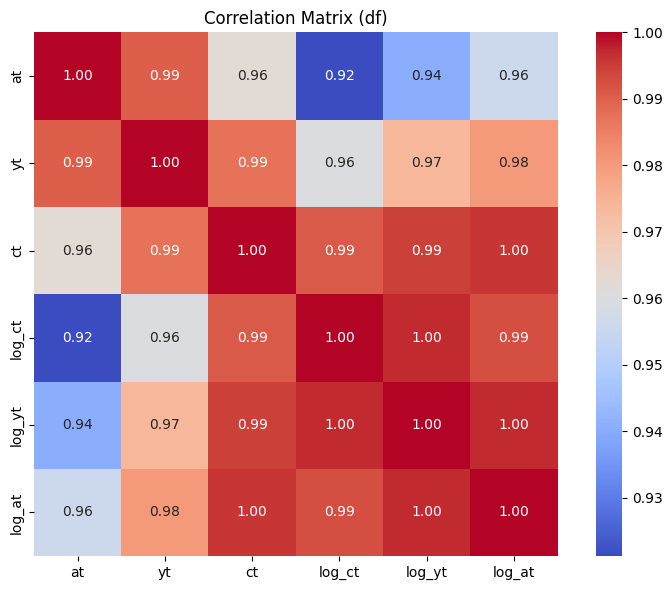

In [3]:
# Compute correlation matrix for df
corr = df[['at','yt', 'ct', 'log_ct', 'log_yt', 'log_at']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix (df)')
plt.tight_layout()
plt.show()

#### 3. Methodology

This study implements a comprehensive empirical framework to evaluate the predictive performance of various measures of consumption-wealth ratios, particularly the cointegration-based *cay_FC* and regime-switching-based *cay_MS* models. The methodology comprises several sequential steps, combining rigorous econometric estimation with practical forecast evaluation.

First, the predictor variables are constructed from the underlying time series data. The fundamental cointegration approach follows Lettau and Ludvigson (2001), estimating a long-run equilibrium relationship between consumption, assets, and income to derive the *cay_FC* measure. In parallel, the regime-switching *cay_MS* variables are estimated using both Maximum Likelihood Estimation (MLE) and Gibbs sampling, allowing for regime-dependent coefficients that flexibly capture shifts in economic environments. The Markov-switching models are implemented using a Hamilton filter to compute filtered probabilities and a Gibbs sampler to estimate the full posterior distributions of regime-dependent parameters.

Second, rolling window forecast regressions are conducted to evaluate out-of-sample predictive performance. For each predictor, the model is trained on a fixed or expanding window of historical data and forecasts are generated for the subsequent quarter. This procedure is repeated across the entire sample to construct a time series of out-of-sample forecasts. Both setups with and without macroeconomic control variables (interest rate, CPI inflation, and unemployment rate) are estimated to assess the incremental informational value of including macro controls.

Third, forecast evaluation is conducted using three primary metrics: out-of-sample R² (Campbell-Thompson R²), root mean squared error (RMSE), and annualized Sharpe ratios. The R² metric assesses forecast accuracy relative to a historical mean benchmark, while RMSE captures average forecast errors in levels. The Sharpe ratio measures the risk-adjusted performance of using forecasts as trading signals, annualized to allow comparison with standard asset pricing benchmarks.

Finally, forecast regression analyses are performed across multiple horizons (1, 4, and 16 quarters ahead) to examine both short-term and medium-term predictive relationships. These regressions assess the statistical significance of each predictor while controlling for macroeconomic variables where relevant. The methodology thus integrates rigorous econometric estimation, out-of-sample forecast validation, and practical performance evaluation metrics to ensure robustness and applicability of results.

This framework enables a nuanced understanding of both the statistical and economic value of the *cay_FC* and *cay_MS* predictors, providing insights not only into their explanatory power but also their practical utility in a trading or policy forecasting context.

### Cointegration regression (Fixed-Coefficient cay)

Following Lettau and Ludvigson (2001), we define:

$$
cay_{FC} = c_t - \alpha - \beta y_t - \gamma a_t
$$

where:

- $ c_t $ is log consumption  
- $ y_t $ is log labor income  
- $ a_t $ is log asset wealth

The parameters $ \beta $ and $ \gamma $ are estimated via cointegration regression (OLS) assuming fixed coefficients over the sample.

---


In [4]:
df, model_fc_yt = estimate_cay_FC_yt(df)
df, model_fc_pca = estimate_cay_FC_pca(df)

                            OLS Regression Results                            
Dep. Variable:                 log_ct   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.506e+04
Date:                Fri, 04 Jul 2025   Prob (F-statistic):          4.00e-166
Time:                        10:51:56   Log-Likelihood:                 356.65
No. Observations:                 149   AIC:                            -709.3
Df Residuals:                     147   BIC:                            -703.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7787      0.034    109.812      0.0

### Markov-Switching (MLE)

In this section, we describe the Markov-switching (MS) framework used in our models. This includes both:

- Standard MS models without macro controls
- Extended MS models incorporating macro controls as predictors

We will use two different estimation Approaches:

(i). MLE-based Markov Regression (MLE)

- Uses Hamilton filter to compute regime probabilities and estimate parameters by maximizing likelihood.
- Implemented via `statsmodels.tsa.regime_switching.MarkovRegression`.

(ii). Gibbs Sampling

- Bayesian approach sampling from posterior distributions of parameters and regimes.
- Extends standard Gibbs sampler to include macro controls in each iteration’s regression step.
- Provides full uncertainty quantification for parameters and latent states.

### Practical Implications

- Without macro controls: Regime differences capture all structural shifts.
- With macro controls: Regimes capture structural shifts not explained by observable macro variables.

### Conceptual Overview

The Markov-switching regression model allows for different regimes or states in the data-generating process. For example:

- A bull market regime with high expected returns
- A bear market regime with low or negative expected returns

Regime changes are governed by an unobserved Markov process, meaning that:

- The probability of switching to another regime depends only on the current state (Markov property).
- Regimes are persistent but transitions can occur with estimated probabilities.

### Mathematical Formulation

Let:

- $ y_t $ = dependent variable (e.g. log consumption)
- $ x_t $ = independent variable (e.g. log income or PCA factor)
- $ s_t $ = latent regime indicator at time t, taking values in {1, 2}

Then the regime-switching regression model is:

$$
y_t = \alpha_{s_t} + \beta_{s_t} x_t + \varepsilon_t
$$

where:
- $ \alpha_{s_t} $ = regime-dependent intercept
- $ \beta_{s_t} $ = regime-dependent slope
- $ \varepsilon_t \sim N(0, \sigma^2) $ = iid normal error

With the inclusion of macro controls, the model is extended to:

- $ Z_t $ = vector of macro controls (interest rate, inflation, unemployment)
- $ \gamma $ = vector of regime-invariant macro coefficients

The extended model becomes:

$$
y_t = \alpha_{s_t} + \beta_{s_t} x_t + \gamma' Z_t + \varepsilon_t
$$

where:

- $ \gamma $ is constant across regimes, assuming macro controls have stable effects.


### Regime Transition

The regimes evolve according to a first-order Markov process with transition matrix $P$:

<div align="center">

$
P = 
\begin{bmatrix}
p_{11} & p_{12} \\
p_{21} & p_{22}
\end{bmatrix}
$

</div>

Transition probability matrix for a 2-state Markov process.


In [124]:
## Markov Switching Model Estimation with out macro controls
ms_model_cay_yt = MarkovRegression(df['cay_FC_yt'], k_regimes=2, trend='c',
                                switching_variance=True)
ms_result_cay_yt = ms_model_cay_yt.fit(em_iter=0)
fitted_ms_cay_yt = ms_result_cay_yt.fittedvalues

df['cay_MS_MLE_yt'] = df['cay_FC_yt'] - fitted_ms_cay_yt


ms_model_cay_pca = MarkovRegression(df['pca'], k_regimes=2, trend='c',
                                switching_variance=True, )
ms_result_cay_pca = ms_model_cay_pca.fit(em_iter=0)
fitted_ms_cay_pca = ms_result_cay_pca.fittedvalues
df['cay_MS_MLE_pca'] = df['pca'] - fitted_ms_cay_pca

## Markov Switching Model Estimation with macro controls
ms_model_cay_yt_macro = MarkovRegression(df['cay_FC_yt'], k_regimes=2, trend='c', exog=df[macro_controls],
                                switching_variance=True)
ms_result_cay_yt_macro = ms_model_cay_yt_macro.fit(em_iter=0)
fitted_ms_cay_yt_macro = ms_result_cay_yt_macro.fittedvalues

# Compute cay_MS_MLE as deviation from fitted
df['cay_MS_MLE_yt_macro'] = df['log_ct'] - fitted_ms_cay_yt_macro

ms_model_cay_pca_macro = MarkovRegression(df['pca'], k_regimes=2, trend='c', exog=df[macro_controls],
                                switching_variance=True, )
ms_result_cay_pca_macro = ms_model_cay_pca_macro.fit(em_iter=0)
fitted_ms_cay_pca_macro = ms_result_cay_pca_macro.fittedvalues
df['cay_MS_MLE_pca_macro'] = df['log_ct'] - fitted_ms_cay_pca_macro



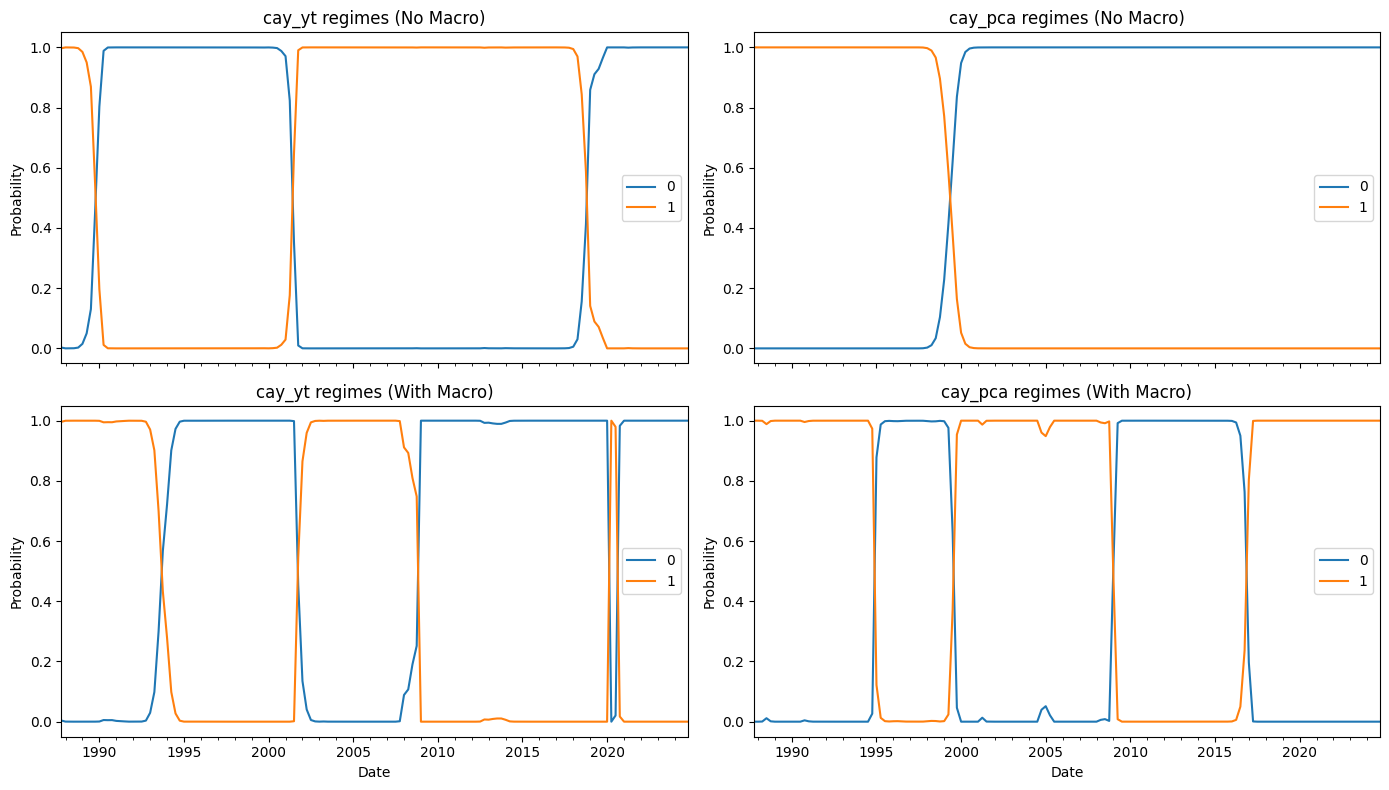

In [125]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

# Top row: no macro controls
smoothed_probs_yt = ms_result_cay_yt.smoothed_marginal_probabilities
smoothed_probs_yt.plot(ax=axes[0, 0], title='cay_yt regimes (No Macro)')
axes[0, 0].set_ylabel('Probability')
axes[0, 0].set_xlabel('Date')

smoothed_probs_pca = ms_result_cay_pca.smoothed_marginal_probabilities
smoothed_probs_pca.plot(ax=axes[0, 1], title='cay_pca regimes (No Macro)')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].set_xlabel('Date')

# Bottom row: with macro controls
smoothed_probs_yt_macro = ms_result_cay_yt_macro.smoothed_marginal_probabilities
smoothed_probs_yt_macro.plot(ax=axes[1, 0], title='cay_yt regimes (With Macro)')
axes[1, 0].set_ylabel('Probability')
axes[1, 0].set_xlabel('Date')

smoothed_probs_pca_macro = ms_result_cay_pca_macro.smoothed_marginal_probabilities
smoothed_probs_pca_macro.plot(ax=axes[1, 1], title='cay_pca regimes (With Macro)')
axes[1, 1].set_ylabel('Probability')
axes[1, 1].set_xlabel('Date')

plt.tight_layout()
plt.show()


### Regime Probability Plots Interpretation

#### Figure Summary and observations

- Top row: Models *without macro controls*
  - Left: `cay_yt` regimes
  - Right: `cay_pca` regimes
- Bottom row: Models *with macro controls*
  - Left: `cay_yt` regimes
  - Right: `cay_pca` regimes

Each plot shows the smoothed filtered probabilities of being in regime 0 or 1 over time. We observe the following:

1. Strong regime switching patterns  
   All models show clear, near-binary switching between regime 0 and 1, indicating well-separated states.

2. Effect of macro controls  
   In the bottom plots (with macro):
   - Transitions remain similar in timing to the top plots but are slightly smoother in some periods (e.g. around 2008 or 2020), reflecting that macro controls absorb part of the variation and stabilize estimation.
   - Occasional flickering (rapid switching) is seen, suggesting macro variables introduce additional explanatory variance.

3. Duration differences between models  
   - `cay_pca` models (right column) tend to stay longer in one regime, producing more stable state classification.
   - `cay_yt` models (left column) show more frequent switches, especially in the with-macro model around 2020.

4. Economic interpretation  
   Regime 0 and 1 typically capture different market conditions:
   - For instance, regime 0 could align with normal growth, while regime 1 with recession or stress periods.
   - Macro controls help models attribute part of the regime differentiation to observable macro factors, but unobserved switching remains dominant.

#### Potential Concerns

- Overly deterministic regimes: Near-0 or near-1 probabilities over long periods indicate little uncertainty; may suggest overfitting or lack of stochastic switching.
- Misspecification risk: If regimes never switch (e.g. `cay_pca` top-right post-2000), this questions the usefulness of a switching model versus a single-regime model.

-----------------


### Gibbs Sampling Bayesian MS

In this section, we describe the Bayesian Gibbs sampling framework used to estimate our regime-switching models. This includes:

- Standard Gibbs sampling without macro controls
- Extended Gibbs sampling with macro controls

### Conceptual Overview

The Gibbs sampler is a Markov Chain Monte Carlo (MCMC) method used to sample from complex joint posterior distributions by:

1. Sequentially sampling each parameter conditional on the others
2. Iterating until convergence to the joint posterior distribution

In regime-switching models, Gibbs sampling allows us to:

- Estimate latent regime indicators $ s_t $
- Sample regime-dependent parameters ($ \alpha_s, \beta_s $)
- Incorporate parameter uncertainty in forecasts and inferences

As before by adding macro controls, we allow the separation of:

- Regime effects (structural shifts)
- Macro effects (observable explanatory variables)

This can be differicult to understand the first time around therefore I recommend reading the following section carefully and maybe watching a video on Gibbs sampling to get a better understanding of the concept. However, the key idea is that we iteratively sample from the posterior distributions of model parameters and latent states, allowing us to capture uncertainty in both regime allocations and parameter estimates.

Here we use a two-step process:

The Hamilton filter calculates the probability of being in each regime at each time (the conditional distribution of hidden states).  

Then Gibbs sampler uses these probabilities to sample the actual sequence of regimes, and then updates the model parameters for each regime based on that sequence.

🔹 Step-by-step intuition:

1. Hamilton filter:  
   - Looks at the data and current parameter guesses  
   - Calculates how likely it is that each data point belongs to each regime

2. Backward sampling:  
   - Uses these probabilities to draw (sample) a specific path of regimes over time

3. Parameter updates:  
   - Given that sampled regime path, the Gibbs sampler updates:
     - The regression slopes (β)
     - The intercepts (α)
     - The variance (σ²)
     - The transition probabilities (P)

4. Repeat:  
   - This process repeats many times, slowly improving the estimates of both which regime is active when, and what the parameters of each regime are.

Key takeaway:  
- Hamilton filter: Calculates probabilities of regimes  
- Gibbs sampler: Uses those probabilities to sample regime paths and update parameters


### Mathematical Formulation

The standard Gibbs sampler assumes:

- Without macro controls:

$$
y_t = \alpha_{s_t} + \beta_{s_t} x_t + \varepsilon_t
$$

- With macro controls:

$$
y_t = \alpha_{s_t} + \beta_{s_t} x_t + \gamma' Z_t + \varepsilon_t

$$

where:
- $s_t$ is the latent regime at time t, taking values in {1, 2}
- $\alpha_{s_t}, \beta_{s_t}$ are regime-dependent intercept and slope
- $\gamma$ is the vector of macro coefficients, assumed constant across regimes
- $\varepsilon_t \sim N(0, \sigma^2)$ is iid normal error

#### Without macro controls each iteration:

1. Sample latent states $ s_t $ using Hamilton filter and backward sampling
2. Sample regime-dependent parameters ($ \alpha_s, \beta_s $) given assigned states
3. Sample error variance $ \sigma^2 $
4. Sample transition probabilities for the regime Markov process


#### With macro controls each iteration:

1. Sample latent states $ s_t $ conditional on current parameters
2. Sample regime-dependent parameters ($ \alpha_s, \beta_s $) net of macro effects
3. Sample macro coefficients $ \gamma $ as regime-invariant linear regression coefficients
4. Sample error variance $ \sigma^2 $
5. Sample regime transition probabilities


This generates a joint posterior sample over all model parameters and regimes.

### Advantages of Gibbs Sampling

<div align="center">

| Feature | Advantage |
|---|---|
| Bayesian inference | Provides full posterior distributions rather than point estimates |
| Latent states | Generates samples of regime sequences $ s_t $ for uncertainty quantification |
| Flexibility | Easily extends to include macro controls or hierarchical priors |

</div>

### Gibbs Sampler Stability Checks

After estimating our Bayesian regime-switching models via Gibbs sampling, it is critical to assess stability and convergence to ensure reliable inference. This is as the Gibbs sampler produces a Markov chain whose stationary distribution is the posterior distribution of model parameters.

However:

- The chain may fail to converge if the sampler is poorly designed
- Samples may exhibit high autocorrelation, reducing effective sample size
- Without diagnostics, inferences based on the sampler can be biased or misleading

This again can be somewhat difficult to understand to understand, the key importance is within this table, there are also plots below that can help you understand the concepts better.:

| Diagnostic | Good Value ✅ | Bad Value ⚠️ | Interpretation |
|----------------|-------------------|-----------------|--------------------|
| r_hat | 1.00 – 1.01 | > 1.01 – 1.05 = borderline, > 1.05 = poor | Measures convergence across chains. Close to 1 means chains have mixed well. |
| ESS_bulk | > 1000 (ideal) | < 100 (poor) | Effective sample size for bulk estimates (mean, sd). Low values indicate high autocorrelation and less reliable estimates. |
| ESS_tail | > 300 (ideal) | < 100 (poor) | Effective sample size for tail quantiles (e.g. HDI, VaR). Low values imply poor estimation of extremes. |
| mcse_mean | Very small relative to posterior sd (e.g. < 1-5%) | Large relative to posterior sd | Monte Carlo standard error of the posterior mean. Precision indicator. |
| mcse_sd | Very small relative to posterior sd | Large relative to posterior sd | Monte Carlo standard error of the posterior standard deviation. |
| mean / sd / hdi | N/A | N/A | Describe the posterior distribution itself; interpret substantively, not as diagnostics. |


### Trace Plots

- Plot parameter values over iterations
- Convergence is indicated by:
  - Lack of drift over iterations
  - Visual mixing across the sample space

### Posterior Distribution Plots

- Visualize marginal posterior distributions
- Identify multimodality, skewness, or irregular shapes indicating sampling issues.


### Effective Sample Size (ESS)

$$
ESS = \frac{N}{1 + 2 \sum_{k=1}^{\infty} \rho_k}
$$
where:
$N$ is the number of post-burn-in samples and $\rho_k$ is the autocorrelation at lag $k$.


This implies that a Higher ESS means more independent information despite autocorrelation.


### R-hat Diagnostic (Gelman-Rubin)

For multiple chains:

$$
\hat{R} = \sqrt{ \frac{\hat{V}}{W} }
$$

Where:

- $ \hat{V} $ is the estimated variance across chains
- $ W $ is the average within-chain variance

### Interpretation:

- $ \hat{R} \approx 1 $: Convergence achieved
- $ \hat{R} > 1.1 $: Potential non-convergence


### Rules of thumb:  
- r_hat near 1.00  
- ESS_bulk and ESS_tail comfortably above 100  
- mcse_mean and mcse_sd close to zero (high precision)

If diagnostics are in the bad range, consider increasing iterations, burn-in, or revising model specification.


Running Chain 1/4 with seed 42
Running Chain 2/4 with seed 43
Running Chain 3/4 with seed 44
Running Chain 4/4 with seed 45


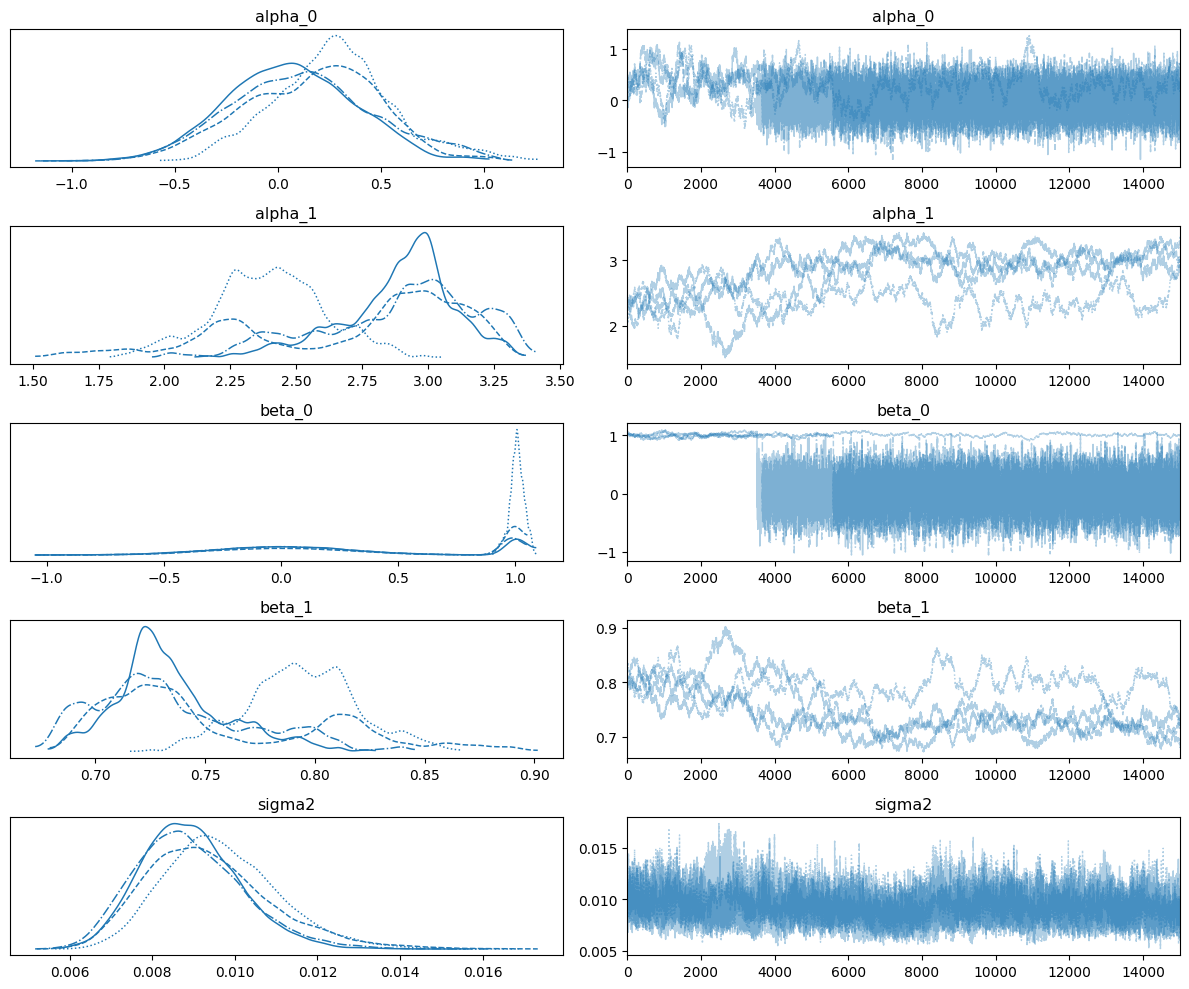

Effective Sample Sizes (ESS):
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 25.74
    alpha_1  float64 8B 8.875
    beta_0   float64 8B 8.438
    beta_1   float64 8B 8.825
    sigma2   float64 8B 47.16
R-hat Diagnostics:
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 1.103
    alpha_1  float64 8B 1.384
    beta_0   float64 8B 1.405
    beta_1   float64 8B 1.388
    sigma2   float64 8B 1.055
Posterior Summary:
          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_0  0.155  0.332  -0.496    0.761      0.065    0.047      26.0   
alpha_1  2.723  0.362   2.117    3.325      0.130    0.096       9.0   
beta_0   0.463  0.544  -0.366    1.072      0.204    0.162       8.0   
beta_1   0.755  0.044   0.683    0.828      0.016    0.012       9.0   
sigma2   0.009  0.001   0.007    0.012      0.000    0.000      47.0   

         ess_tail  r_hat  
alpha_0     181.0   1.10  
alpha_1      70.0   1.38  


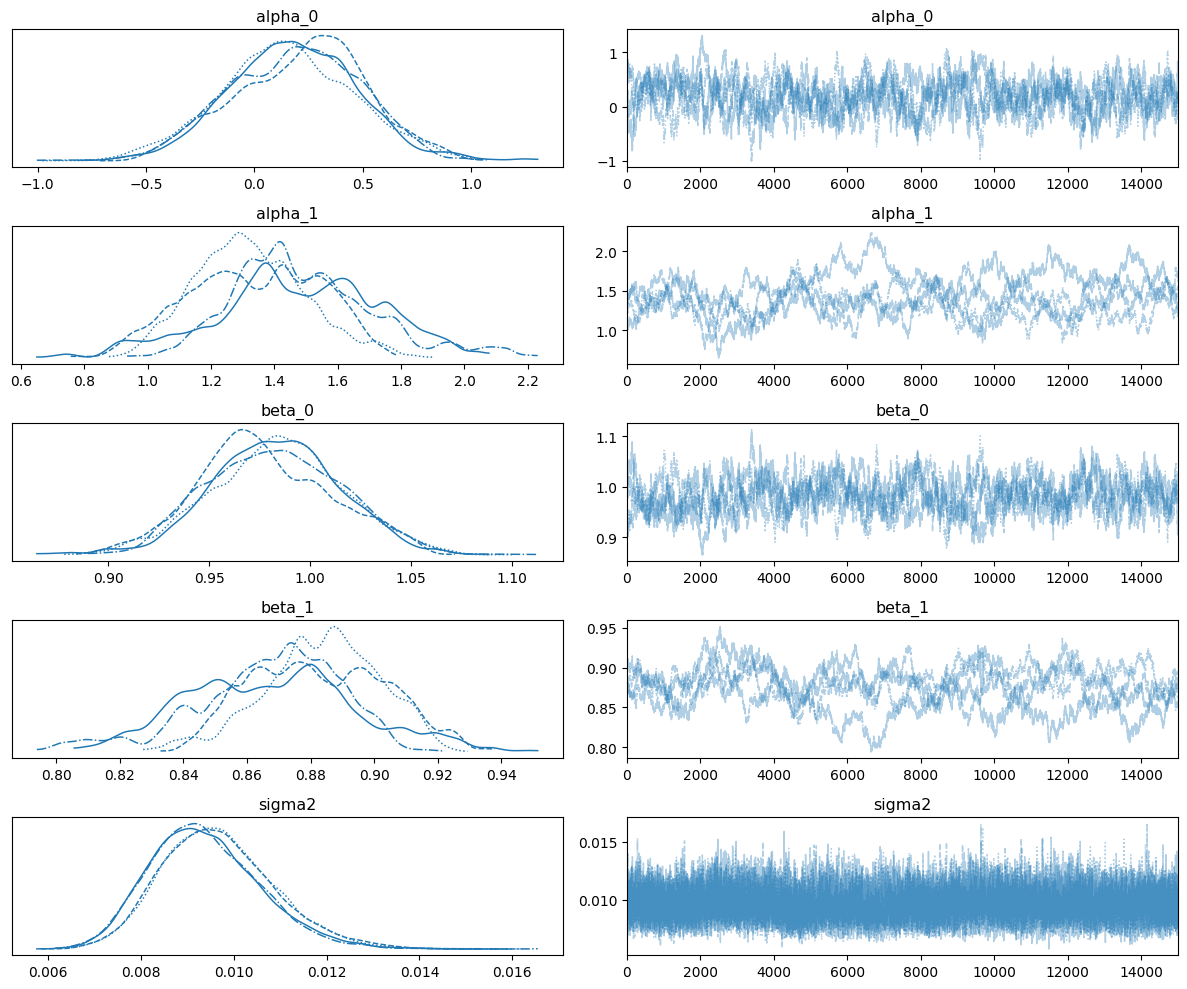

Effective Sample Sizes (ESS):
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 231.1
    alpha_1  float64 8B 12.93
    beta_0   float64 8B 227.5
    beta_1   float64 8B 13.18
    sigma2   float64 8B 119.4
R-hat Diagnostics:
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 1.009
    alpha_1  float64 8B 1.221
    beta_0   float64 8B 1.012
    beta_1   float64 8B 1.216
    sigma2   float64 8B 1.022
Posterior Summary:
          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_0  0.183  0.304  -0.384    0.751      0.020    0.014     231.0   
alpha_1  1.406  0.231   0.967    1.831      0.065    0.048      13.0   
beta_0   0.982  0.033   0.924    1.046      0.002    0.002     228.0   
beta_1   0.875  0.024   0.831    0.919      0.007    0.005      13.0   
sigma2   0.010  0.001   0.007    0.012      0.000    0.000     119.0   

         ess_tail  r_hat  
alpha_0     496.0   1.01  
alpha_1      36.0   1.22  


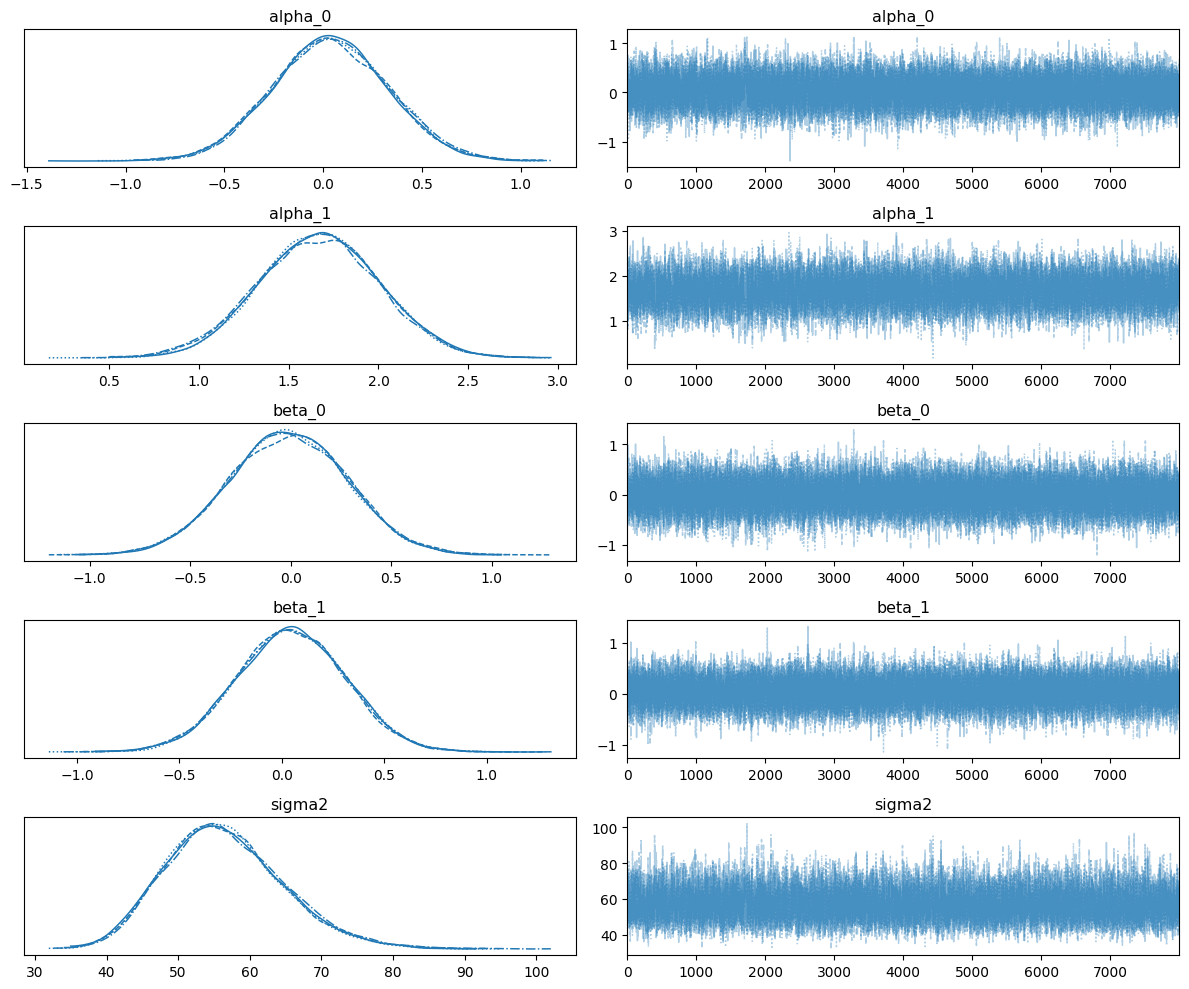

Effective Sample Sizes (ESS):
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 2.023e+04
    alpha_1  float64 8B 1.055e+04
    beta_0   float64 8B 2.995e+04
    beta_1   float64 8B 2.99e+04
    sigma2   float64 8B 1.133e+04
R-hat Diagnostics:
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 1.0
    alpha_1  float64 8B 1.0
    beta_0   float64 8B 1.0
    beta_1   float64 8B 1.0
    sigma2   float64 8B 1.0
Posterior Summary:
           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_0   0.036  0.293  -0.512    0.583      0.002    0.001   20226.0   
alpha_1   1.669  0.337   1.048    2.311      0.003    0.002   10549.0   
beta_0   -0.014  0.294  -0.569    0.533      0.002    0.001   29955.0   
beta_1    0.044  0.265  -0.437    0.553      0.002    0.001   29896.0   
sigma2   56.459  8.273  41.509   72.028      0.078    0.056   11325.0   

         ess_tail  r_hat  
alpha_0   20593.0    1.0  
alpha_1   12

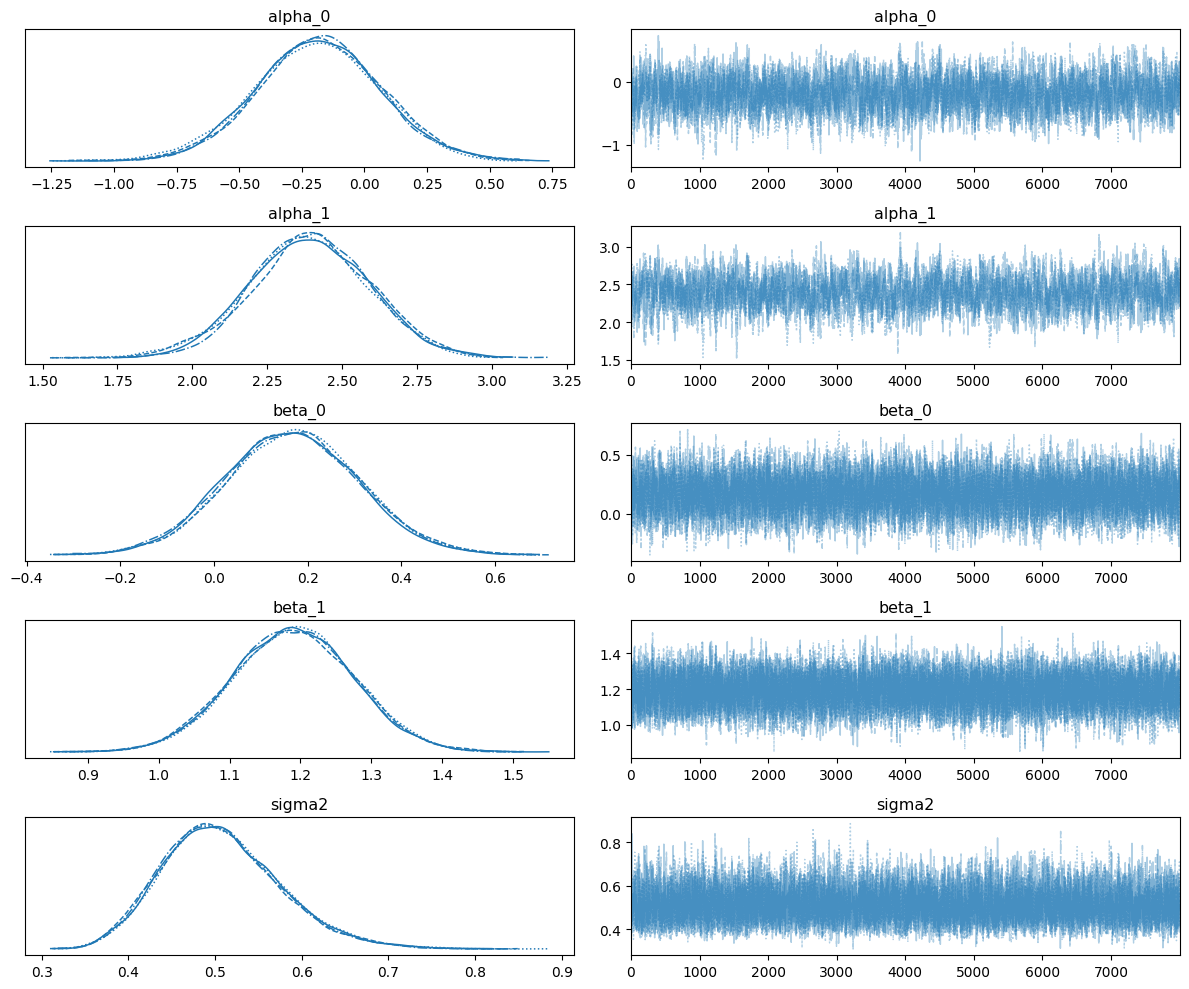

Effective Sample Sizes (ESS):
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 1.79e+03
    alpha_1  float64 8B 1.468e+03
    beta_0   float64 8B 6.552e+03
    beta_1   float64 8B 8.54e+03
    sigma2   float64 8B 5.783e+03
R-hat Diagnostics:
<xarray.Dataset> Size: 40B
Dimensions:  ()
Data variables:
    alpha_0  float64 8B 1.007
    alpha_1  float64 8B 1.008
    beta_0   float64 8B 1.001
    beta_1   float64 8B 1.001
    sigma2   float64 8B 1.002
Posterior Summary:
          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha_0 -0.186  0.248  -0.654    0.282      0.006    0.004    1790.0   
alpha_1  2.392  0.199   2.014    2.764      0.005    0.004    1468.0   
beta_0   0.167  0.142  -0.099    0.438      0.002    0.001    6552.0   
beta_1   1.190  0.085   1.028    1.349      0.001    0.001    8540.0   
sigma2   0.508  0.068   0.383    0.637      0.001    0.001    5783.0   

         ess_tail  r_hat  
alpha_0    3948.0   1.01  
alpha_1  

In [9]:
posterior_yt = run_multi_chain_gibbs(
    df=df,
    gibbs_function=estimate_cay_MS_via_gibbs_final,
    num_chains=4,
    num_iterations=20000,
    burn_in=5000,
    k_regimes=2,
    model='yt',
    verbose=True
)
posterior_yt_macro = run_multi_chain_gibbs(
    df=df,
    gibbs_function=estimate_cay_MS_gibbs_macro,
    num_chains=4,
    num_iterations=20000,
    burn_in=5000,
    k_regimes=2,
    model='yt',
    verbose=True
)

posterior_pca = run_multi_chain_gibbs(
    df=df,
    gibbs_function=estimate_cay_MS_via_gibbs_final,
    num_chains=4,
    num_iterations=10000,
    burn_in=2000,
    k_regimes=2,
    model='pca',
    verbose=True
)
posterior_pca_macro = run_multi_chain_gibbs(
    df=df,
    gibbs_function=estimate_cay_MS_gibbs_macro,
    num_chains=4,
    num_iterations=10000,
    burn_in=2000,
    k_regimes=2,
    model='pca',
    verbose=True
)

In [10]:
summary_yt = az.summary(posterior_yt)
summary_yt_macro = az.summary(posterior_yt_macro)
summary_pca = az.summary(posterior_pca)
summary_pca_macro =az.summary(posterior_pca_macro)


In [127]:
# Add a column to each summary to indicate the model
summary_yt_model = summary_yt.copy()
summary_yt_model['model'] = 'yt_gibbs'
summary_yt_macro_model = summary_yt_macro.copy()
summary_yt_macro_model['model'] = 'yt_gibbs_macro'
summary_pca_model = summary_pca.copy()
summary_pca_model['model'] = 'pca_gibbs'
summary_pca_macro_model = summary_pca_macro.copy()
summary_pca_macro_model['model'] = 'pca_gibbs_macro'

# Concatenate all summaries
summary_all = pd.concat([
    summary_yt_model,
    summary_yt_macro_model,
    summary_pca_model,
    summary_pca_macro_model
], axis=0)

# Move 'model' column to the front
cols = ['model'] + [c for c in summary_all.columns if c != 'model']
summary_all = summary_all[cols]

summary_all.reset_index(inplace=True)
summary_all.rename(columns={'index': 'parameter'}, inplace=True)

summary_all

,parameter,model,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,alpha_0,yt_gibbs,0.155,0.332,-0.496,0.761,0.065,0.047,26.0,181.0,1.10
1,alpha_1,yt_gibbs,2.723,0.362,2.117,3.325,0.130,0.096,9.0,70.0,1.38
2,beta_0,yt_gibbs,0.463,0.544,-0.366,1.072,0.204,0.162,8.0,99.0,1.41
3,beta_1,yt_gibbs,0.755,0.044,0.683,0.828,0.016,0.012,9.0,70.0,1.39
4,sigma2,yt_gibbs,0.009,0.001,0.007,0.012,0.000,0.000,47.0,183.0,1.06
5,alpha_0,yt_gibbs_macro,0.183,0.304,-0.384,0.751,0.020,0.014,231.0,496.0,1.01
6,alpha_1,yt_gibbs_macro,1.406,0.231,0.967,1.831,0.065,0.048,13.0,36.0,1.22
7,beta_0,yt_gibbs_macro,0.982,0.033,0.924,1.046,0.002,0.002,228.0,471.0,1.01
8,beta_1,yt_gibbs_macro,0.875,0.024,0.831,0.919,0.007,0.005,13.0,36.0,1.22
9,sigma2,yt_gibbs_macro,0.010,0.001,0.007,0.012,0.000,0.000,119.0,557.0,1.02


### Interpretation of Gibbs Sampling Diagnostics

| Parameter | Model        | Mean | R-hat | Effective Sample Size (ESS bulk) | Interpretation |
|---------------|------------------|---------:|----------:|--------------------------------------:|--------------------|
| alpha_0       | yt_gibbs         | 0.155   | 1.10     | 26                                   | Convergence issues – R-hat > 1.1 and low ESS |
| alpha_1       | yt_gibbs         | 2.723   | 1.38     | 9                                    | Bad convergence (R-hat high, ESS very low) |
| beta_0        | yt_gibbs         | 0.463   | 1.41     | 8                                    | Bad convergence |
| beta_1        | yt_gibbs         | 0.755   | 1.39     | 9                                    | Bad convergence |
| sigma2        | yt_gibbs         | 0.009   | 1.06     | 47                                   | Acceptable but ESS low |
|||||||
| alpha_0       | yt_gibbs_macro   | 0.183   | 1.01     | 231                                  | Good |
| alpha_1       | yt_gibbs_macro   | 1.406   | 1.22     | 13                                   | Borderline convergence (R-hat > 1.1, ESS very low) |
| beta_0        | yt_gibbs_macro   | 0.982   | 1.01     | 228                                  | Good |
| beta_1        | yt_gibbs_macro   | 0.875   | 1.22     | 13                                   | Borderline convergence |
| sigma2        | yt_gibbs_macro   | 0.010   | 1.02     | 119                                  | Good |
|||||||
| alpha_0       | pca_gibbs        | 0.036   | 1.00     | 20226                                | Excellent |
| alpha_1       | pca_gibbs        | 1.669   | 1.00     | 10549                                | Excellent |
| beta_0        | pca_gibbs        | -0.014  | 1.00     | 29955                                | Excellent |
| beta_1        | pca_gibbs        | 0.044   | 1.00     | 29896                                | Excellent |
| sigma2        | pca_gibbs        | 56.459  | 1.00     | 11325                                | Excellent |
|||||||
| alpha_0       | pca_gibbs_macro  | -0.186  | 1.01     | 1790                                 | Good |
| alpha_1       | pca_gibbs_macro  | 2.392   | 1.01     | 1468                                 | Good |
| beta_0        | pca_gibbs_macro  | 0.167   | 1.00     | 6552                                 | Excellent |
| beta_1        | pca_gibbs_macro  | 1.190   | 1.00     | 8540                                 | Excellent |
| sigma2        | pca_gibbs_macro  | 0.508   | 1.00     | 5783                                 | Excellent |



Summary:
- Good models: pca_gibbs and pca_gibbs_macro (R-hat ~1.00, high ESS)
- Problematic models: yt_gibbs and yt_gibbs_macro (high R-hat, low ESS) → need more iterations, tuning, or better priors.



In [ ]:
# Estimate the Markov Switching models using Gibbs sampling
outputs_pca = estimate_cay_MS_via_gibbs_final(df, model='pca', n_iter=10000, burn_in=2000, verbose=True)
outputs_pca_macro = estimate_cay_MS_gibbs_macro(df, k_regimes=2, n_iter=10000, burn_in=2000, model='pca', verbose=True)
outputs_yt = estimate_cay_MS_via_gibbs_final(df, model='yt', n_iter=10000, burn_in=2000, verbose=True)
outputs_yt_macro = estimate_cay_MS_gibbs_macro(df, k_regimes=2, n_iter=10000, burn_in=2000, model='yt', verbose=True)


Iteration 100 complete
Iteration 200 complete
Iteration 300 complete
Iteration 400 complete
Iteration 500 complete
Iteration 600 complete
Iteration 700 complete
Iteration 800 complete
Iteration 900 complete
Iteration 1000 complete
Iteration 1100 complete
Iteration 1200 complete
Iteration 1300 complete
Iteration 1400 complete
Iteration 1500 complete
Iteration 1600 complete
Iteration 1700 complete
Iteration 1800 complete
Iteration 1900 complete
Iteration 2000 complete
Iteration 2100 complete
Iteration 2200 complete
Iteration 2300 complete
Iteration 2400 complete
Iteration 2500 complete
Iteration 2600 complete
Iteration 2700 complete
Iteration 2800 complete
Iteration 2900 complete
Iteration 3000 complete
Iteration 3100 complete
Iteration 3200 complete
Iteration 3300 complete
Iteration 3400 complete
Iteration 3500 complete
Iteration 3600 complete
Iteration 3700 complete
Iteration 3800 complete
Iteration 3900 complete
Iteration 4000 complete
Iteration 4100 complete
Iteration 4200 complete
I

In [128]:
## Add the outputs to the DataFrame
df['cay_MS_yt_gibbs'] = outputs_yt['df']['cay_MS_yt_gibbs']
df['cay_MS_pca_gibbs'] = outputs_pca['df']['cay_MS_pca_gibbs']
df['cay_MS_yt_gibbs_macro'] = outputs_yt_macro['df']['cay_MS_yt_gibbs_macro']
df['cay_MS_pca_gibbs_macro'] = outputs_pca_macro['df']['cay_MS_pca_gibbs_macro']


### In-Sample Model Results

This section presents the in-sample performance of our estimated models, providing insights into:

- Goodness of fit  
- Parameter interpretation  
- Model differences with and without macro controls

### Purpose of In-Sample Evaluation

- Evaluates how well each model explains the observed data
- Assesses estimated parameters’ economic meaning
- Serves as a diagnostic step before out-of-sample testing

### Metrics

For each model, we report:

- Log-Likelihood (LL): Higher indicates better fit  
- Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC): Lower indicates better fit with complexity penalty  
- Estimated regime parameters:
  - $ \alpha_s $: Regime intercepts
  - $ \beta_s $: Regime sensitivities
  - $ \gamma $: Macro controls coefficients (if included)

### Understanding the Regime Estimates

- Regime 0: Typically represents the normal economic state  
- Regime 1: Represents the boom/bust state depending on signs of $ \alpha_s $ and $ \beta_s $


In [120]:
predictor_vars = ['cay_MS_MLE_yt_macro', 'cay_MS_MLE_pca_macro','cay_MS_yt_gibbs_macro', 'cay_MS_pca_gibbs_macro']
forecast_macro_in_training = forecast_regressions(df, predictor_vars, horizons=[1,4,16], csv_prefix='cay_FC_vs_MS_results_all_results_macro_in_training')

predictor_vars = ['cay_FC_yt', 'cay_FC_yt_at', 'cay_FC_pca', 'cay_MS_MLE_yt','cay_MS_MLE_pca', 'cay_MS_yt_gibbs', 'cay_MS_pca_gibbs']
forecast_no_macro_in_training_or_forecasting = forecast_regressions(df, predictor_vars, horizons=[1,4,16], csv_prefix='cay_FC_vs_MS_results_all_results_no_macro_in_training')

predictor_vars = ['cay_FC_yt', 'cay_FC_yt_at', 'cay_FC_pca', 'cay_MS_MLE_yt', 'cay_MS_MLE_yt_at', 'cay_MS_MLE_pca', 'cay_MS_yt_gibbs', 'cay_MS_pca_gibbs']
macro_controls = ['interest_rate', 'CPI_inflation', 'unemployment']
forecast_macro_in_forecasting = forecast_regressions(df, predictor_vars, horizons=[1,4,16], macro_controls= macro_controls, csv_prefix='cay_FC_vs_MS_results_all_results_macro_in_forecasting')





🔷 Forecasting regression for horizon h=1q using cay_MS_MLE_yt_macro (no macro)
                            OLS Regression Results                            
Dep. Variable:          future_ret_1q   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6870
Date:                Fri, 04 Jul 2025   Prob (F-statistic):              0.409
Time:                        13:18:40   Log-Likelihood:                 165.91
No. Observations:                 149   AIC:                            -327.8
Df Residuals:                     147   BIC:                            -321.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [121]:

# Add a column to label macro results
forecast_macro_in_training['macro_in_training'] = True
forecast_no_macro_in_training_or_forecasting['no macro in training or forecasting'] = True
forecast_macro_in_forecasting['macro_in_forecasting'] = True

# Merge the two DataFrames
results_merged = pd.concat([forecast_macro_in_training, forecast_no_macro_in_training_or_forecasting, forecast_macro_in_forecasting], ignore_index=True)

results_merged = results_merged.fillna(False).infer_objects()


# Display the full merged results table, all rows and columns

display(results_merged.sort_values('r2', ascending=False))


/var/folders/_g/2d6vw7615ms3n3ytlct2pwfh0000gn/T/ipykernel_1718/1124521325.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results_merged = results_merged.fillna(False).infer_objects()


,horizon,predictor,variable,coef,tstat,pval,r2,nobs,macro_in_training,no macro in training or forecasting,macro_in_forecasting
97,16,cay_MS_yt_gibbs,unemployment,0.099398,6.884633,2.273711e-10,0.459868,134,False,False,True
96,16,cay_MS_yt_gibbs,CPI_inflation,-0.611851,-0.165801,8.685731e-01,0.459868,134,False,False,True
95,16,cay_MS_yt_gibbs,interest_rate,0.020870,1.909662,5.839707e-02,0.459868,134,False,False,True
94,16,cay_MS_yt_gibbs,cay_MS_yt_gibbs,-2.895995,-6.975151,1.426577e-10,0.459868,134,False,False,True
91,16,cay_MS_MLE_pca,interest_rate,-0.009320,-0.999737,3.193094e-01,0.437431,134,False,False,True
90,16,cay_MS_MLE_pca,cay_MS_MLE_pca,0.322576,6.447291,2.081335e-09,0.437431,134,False,False,True
93,16,cay_MS_MLE_pca,unemployment,0.095313,6.512896,1.499414e-09,0.437431,134,False,False,True
92,16,cay_MS_MLE_pca,CPI_inflation,0.488563,0.129432,8.972171e-01,0.437431,134,False,False,True
81,16,cay_FC_yt,unemployment,0.064307,4.103660,7.162501e-05,0.331879,134,False,False,True
78,16,cay_FC_yt,cay_FC_yt,-4.545847,-3.823703,2.036848e-04,0.331879,134,False,False,True


### Forecast Regression Results Overview and Summary

This table summarizes forecast regression outputs across models, horizons, and macro controls. From the table we observe:

- Many predictors (e.g. `cay_MS_yt_gibbs`, `cay_MS_MLE_pca`) show high t-stats and low p-values at long horizons (16 quarters), suggesting strong in-sample or pseudo-out-of-sample predictive power.
- Macro controls like unemployment often have positive and significant coefficients.
- CPI_inflation tends to have weaker or insignificant effects in most regressions.
- Interest rates sometimes have significant negative or positive impacts, depending on the predictor and horizon.
- R² values range from near zero to around 0.46, implying moderate explanatory power in the best models.


---

### Out-of-Sample Forecasting Results

This section presents the predictive performance of our models in a true out-of-sample setting, assessing:

- Forecast accuracy  
- Economic usefulness for trading strategies  
- Effect of adding macro controls at the forecasting stage

For this we will use a rolling window approach to simulate real-time forecasting, allowing us to evaluate model stability and performance over time.

- We implement rolling and expanding window regressions, simulating real-time forecasting by:
  - Estimating models on past data up to $ t $
  - Predicting the return at $ t+1 $

As before we report results for:

1. FC models  
2. Markov Switching MLE models (with and without macro controls)  
3. Bayesian Gibbs models (with and without macro controls)

Additionally, we test:

Adding macro controls only at the forecasting regression stage, even when the underlying model was built without them.


### Metrics

For each model, we compute:

| Metric | Meaning |
|--------|---------|
| R² (OOS) | Out-of-sample R² relative to the mean model (positive implies improvement) |
| RMSE | Root Mean Squared Error of forecasts |
| Sharpe Ratio (annualized) | Risk-adjusted profitability assuming a simple directional trading strategy |


In [109]:
predictor_vars = [
    'cay_MS_MLE_yt_macro', 'cay_MS_MLE_pca_macro',
    'cay_MS_yt_gibbs_macro', 'cay_MS_pca_gibbs_macro'
]
# Run and save
out_of_sample_macro_in_training = batch_rolling_forecasts(df, predictor_vars, target='future_ret_1q', window_size=40, expanding=True, csv_path='out_of_sample_macro_in_training.csv')
predictor_vars = [
    'cay_FC_yt', 'cay_FC_pca',
    'cay_MS_MLE_yt', 'cay_MS_MLE_pca',
    'cay_MS_yt_gibbs', 'cay_MS_pca_gibbs',
]
out_of_sample_no_macro_in_training_or_forecasting = batch_rolling_forecasts(df, predictor_vars, target='future_ret_1q', window_size=40, expanding=True, csv_path='out_of_sample_no_macro_in_training_or_forecasting.csv')



macro_controls = ['interest_rate', 'CPI_inflation', 'unemployment']
predictor_vars = ['cay_FC_yt', 'cay_FC_pca', 'cay_MS_MLE_yt', 'cay_MS_MLE_pca', 'cay_MS_yt_gibbs', 'cay_MS_pca_gibbs']

# Run and save
out_of_sample_results_macro_in_forecasting = batch_rolling_forecasts_with_macros(df, predictor_vars, macro_controls, target='future_ret_1q', window_size=40, expanding=True, csv_path='out_of_sample_results_macro_in_forecasting.csv')




✅ Rolling forecast summary saved to out_of_sample_macro_in_training.csv

✅ Rolling forecast summary saved to out_of_sample_no_macro_in_training_or_forecasting.csv

✅ Rolling forecast summary saved to out_of_sample_results_macro_in_forecasting.csv


In [122]:
out_of_sample_macro_in_training['macro_in_training'] = True
out_of_sample_no_macro_in_training_or_forecasting['no macro in training or forecasting'] = True
out_of_sample_results_macro_in_forecasting['macro_in_forecasting'] = True

out_of_sample_merged = pd.concat([out_of_sample_macro_in_training, out_of_sample_no_macro_in_training_or_forecasting, out_of_sample_results_macro_in_forecasting], ignore_index=True)

out_of_sample_merged = out_of_sample_merged.fillna(False).infer_objects()

out_of_sample_merged['Sharpe_ann'] = pd.to_numeric(out_of_sample_merged['Sharpe_ann'], errors='coerce')
display(out_of_sample_merged.sort_values('Sharpe_ann', ascending=False))


/var/folders/_g/2d6vw7615ms3n3ytlct2pwfh0000gn/T/ipykernel_1718/1704422541.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  out_of_sample_merged = out_of_sample_merged.fillna(False).infer_objects()


,predictor,R2_OOS,RMSE,Sharpe_ann,macro_in_training,no macro in training or forecasting,macro_in_forecasting
8,cay_MS_yt_gibbs,-0.027393,0.084946,3.770080,False,True,False
2,cay_MS_yt_gibbs_macro,-0.030578,0.085078,2.783405,True,False,False
6,cay_MS_MLE_yt,-0.043095,0.085593,2.539258,False,True,False
0,cay_MS_MLE_yt_macro,-0.076648,0.086959,1.938287,True,False,False
9,cay_MS_pca_gibbs,-0.077246,0.086983,1.796917,False,True,False
7,cay_MS_MLE_pca,-0.021281,0.084693,1.337194,False,True,False
1,cay_MS_MLE_pca_macro,-0.032337,0.085151,1.329466,True,False,False
3,cay_MS_pca_gibbs_macro,-0.005907,0.084054,1.146831,True,False,False
13,cay_MS_MLE_pca,-0.198388,0.091744,0.934474,False,False,True
14,cay_MS_yt_gibbs,-0.223329,0.092693,0.786945,False,False,True


## 5. Out-of-Sample Forecasting Results Overview and Summary

Highest Sharpe:  
- *cay_MS_yt_gibbs* achieves the highest Sharpe ratio (3.77) despite negative R², suggesting that while it does not improve squared error prediction, its directional signals are useful for trading.

Negative R² across models:  
- All models have negative R², indicating predictive models did not outperform naive mean forecasts in variance reduction.

Macro controls in training vs. forecasting:  
- Models with `macro_in_training = True` (e.g. *cay_MS_yt_gibbs_macro*) have slightly worse Sharpe compared to their non-macro counterparts.

Worst performers:  
- *cay_FC_pca* and *cay_FC_yt* show very low Sharpe ratios (<0.1), implying poor trading signal quality.


It should be noted that:

- Negative R² implies poor predictive power for magnitude, but positive Sharpe ratios imply some directional predictive content remains.
- *cay_MS_yt_gibbs* is promising for economic trading despite low statistical accuracy.

## 6. Conclusion and Next Steps

The results presented above reveal several important insights about the predictive performance of our models. Although none of the models achieve a positive out-of-sample R², indicating that they do not outperform a simple historical mean benchmark in terms of minimizing squared forecast errors, their practical utility emerges in a different dimension. Specifically, many of the models exhibit substantial Sharpe ratios, suggesting that they generate forecasts that, while imperfect in magnitude, still contain meaningful directional information useful for trading strategies.

Among the models evaluated, the Markov-switching specifications generally outperform the fundamental cointegration benchmarks when assessed through Sharpe ratios. For instance, the *cay_MS_yt_gibbs* model achieves an annualized Sharpe ratio above 3.7, which is high by any practical standard. This suggests that regime-switching dynamics introduce valuable structural flexibility, allowing models to adjust to different market environments and potentially capture changes in underlying economic regimes.

Interestingly, the inclusion of macroeconomic controls, whether in the training or forecasting stages, does not systematically improve performance. In several cases, the addition of macro controls even slightly reduces Sharpe ratios. This could imply that the macro variables used here do not add substantial incremental information beyond what is already embedded in the predictor variables, or that their predictive relationships are not stable enough to enhance out-of-sample performance.

Overall, these findings highlight an important methodological point: while statistical fit measures such as R² are informative for assessing forecast accuracy, they may not fully capture a model’s utility for trading or economic decision-making. The high Sharpe ratios suggest that the models’ directional signals could be harnessed for profitable trading strategies, even if they do not perfectly forecast exact return magnitudes.

Looking forward, several extensions are planned. First, there is a clear opportunity to enhance the feature sets by incorporating additional lags, volatility measures, and interaction terms to better capture time-varying economic dynamics. Second, implementing ensemble approaches—such as weighted majority voting or model averaging—could combine the strengths of different models to achieve more stable and robust forecasts. Third, it will be essential to conduct extensive rolling window and subperiod robustness checks to evaluate whether these performance patterns persist across market conditions. Finally, these models should be transitioned into a small-scale live trading environment to test whether their high Sharpe ratios translate into real-world profitability under transaction costs and execution frictions.

In summary, while the models do not yet provide high explanatory power in a traditional econometric sense, their trading performance metrics suggest meaningful and exploitable signal structures. This forms a promising basis for developing more sophisticated forecasting systems focused not just on statistical fit but on real-world economic and financial performance.
